In [1]:
from Controller import *
from plot import *

Radius of curvature : 

$r = \frac{(1+(\frac{dy}{dx})^2)^{3/2}}{\frac{d^2y}{dx^2}}$

In [2]:
def maxdeviation(x,y):
    return np.max(np.abs(x))

def moving_average_smoothing(x, y, window_size=3):
    # Apply the moving average on x and y separately
    x_smooth = np.convolve(x, np.ones(window_size)/window_size, mode='same')[1:-1]
    y_smooth = np.convolve(y, np.ones(window_size)/window_size, mode='same')[1:-1]
    return x_smooth, y_smooth

def smoothing_of_curvature(rad):
    newrad = np.zeros(len(rad))
    for i in range(len(rad)):
        if i == 0: newrad[i] = (rad[i]+rad[i+1])/2
        elif i == len(rad)-1: newrad[i] = (rad[i-1]+rad[i])/2
        else : newrad[i] = (rad[i-1]+rad[i]+rad[i+1])/3
    return newrad

def Curvature(x,y):
    # First derivatives
    x,y = moving_average_smoothing(x,y)
    dx_dt = np.gradient(x)
    dy_dt = np.gradient(y)
    
    # Second derivatives
    d2x_dt2 = np.gradient(dx_dt)
    d2y_dt2 = np.gradient(dy_dt)
    
    # Curvature formula
    numerator = np.abs(dx_dt * d2y_dt2 - dy_dt * d2x_dt2)
    denominator = (dx_dt**2 + dy_dt**2)**1.5
    curvature = numerator / denominator
    #print(curvature)
    return curvature

def MaxCurvature(x,y):
    return np.max(Curvature(x,y)[50:-50])

def MeanCurvature(x,y):
    return np.mean(Curvature(x,y)[50:-50])

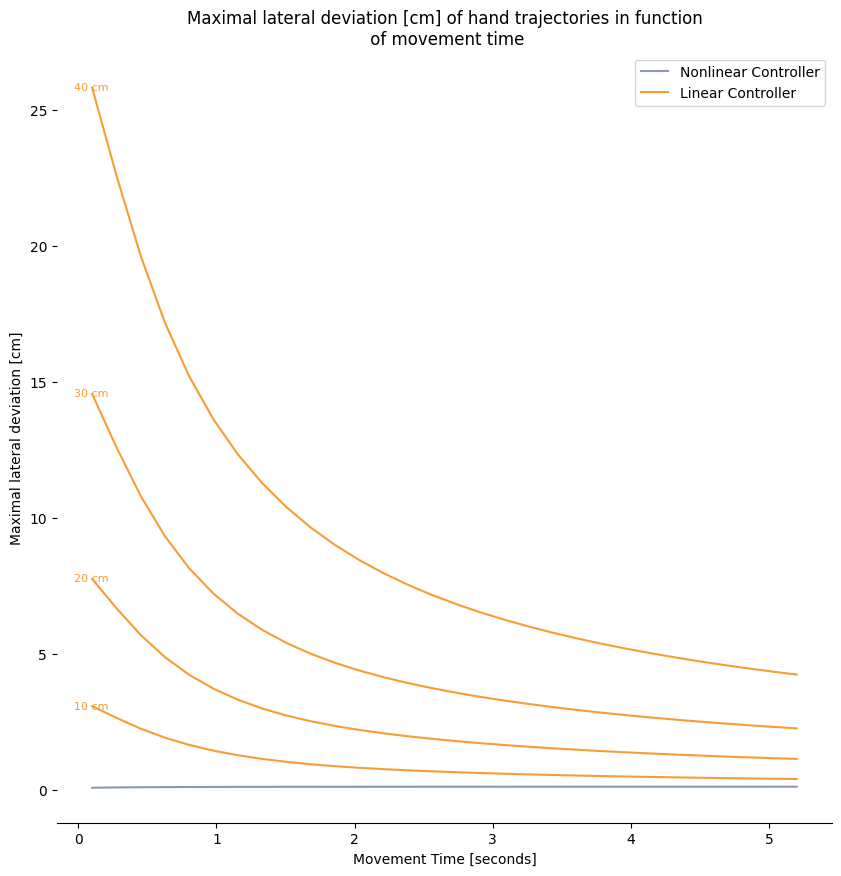

In [3]:
DurationArray = np.linspace(0.1,5.2,30)
MovementArray = [10,20,30,40]

NonlinearityImpact(MovementArray,DurationArray,maxdeviation,"Maximal lateral deviation [cm]")

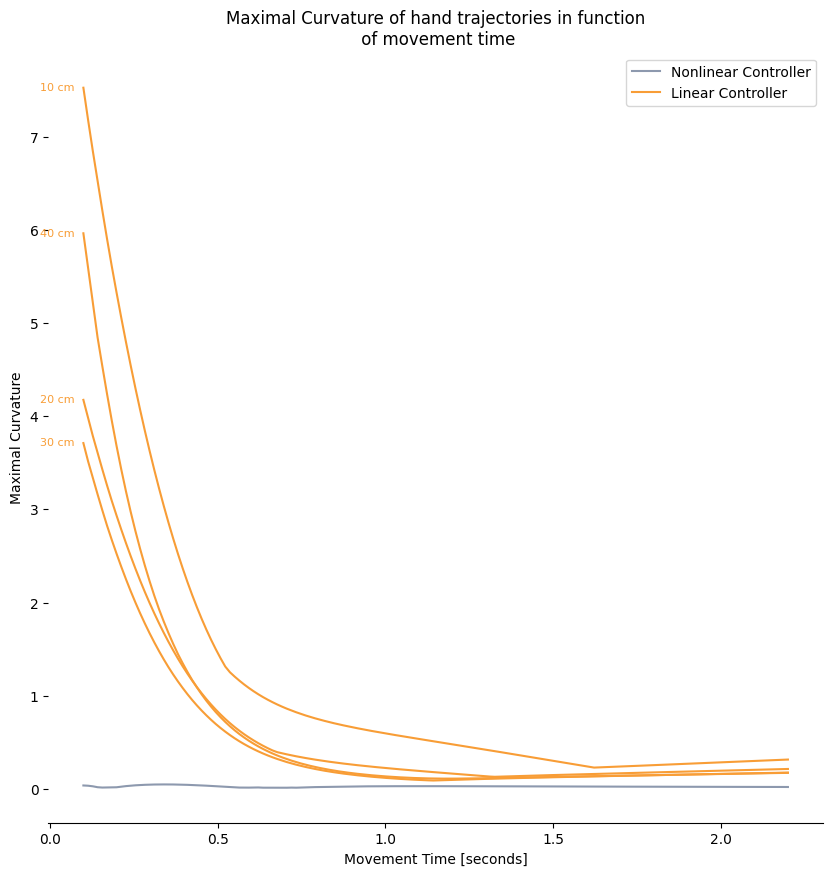

In [9]:
DurationArray = np.linspace(0.1,2.2,150)
MovementArray = [10,20,30,40]

NonlinearityImpact(MovementArray,DurationArray,MaxCurvature,"Maximal Curvature")

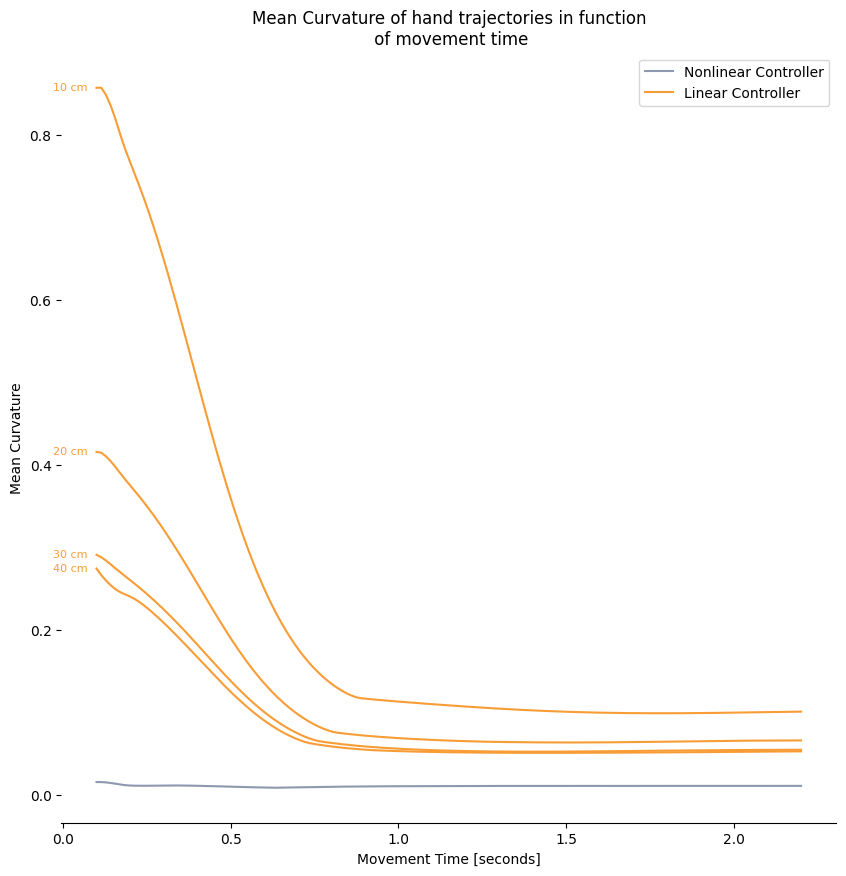

In [10]:
DurationArray = np.linspace(0.1,2.2,150)
MovementArray = [10,20,30,40]

NonlinearityImpact(MovementArray,DurationArray,MeanCurvature,"Mean Curvature")

In [28]:
from scipy.integrate import trapezoid

def Integration(x,y):
    x = np.abs(x)
    # Compute the integral using the trapezoidal rule
    area = trapezoid(x,y)
    
    return area
def Integration2(x,y):
    x = np.abs(x)
    # Compute the integral using the trapezoidal rule
    area = trapezoid(x[20:-20],y[20:-20])
    area = area/(14*14)
    
    return area

In [20]:
x = [-2,0,1,2]
y = [1,2,3,4]
print(trapezoid(np.abs(x),y))

3.0


In [31]:
def NonlinearityImpact(MovementArray,DurationArray,Func,ylabel,Noise = 1e-16):
    SIZE = len(DurationArray)
    COLORLQG = "#F89D36"
    COLORFL = "#8D99AE"
    fig,ax = plt.subplots(figsize = (10,10))

    for MovementLength in MovementArray:

        max_dev_FL = np.zeros(SIZE)
        max_dev_LQG = np.zeros(SIZE)

        for idx,Duration in enumerate(DurationArray):

            XLQG,YLQG = LQG(Duration,1e6,1e6,1e6,1e6,1e-5,1e-5,targets = [0,20+MovementLength],starting_point = [0,20],plot=False,Noise_Variance=Noise)
            XFL,YFL = Feedback_Linearization(Duration,1e6,1e6,1e5,1e5,1e-5,1e-5,targets = [0,20+MovementLength],starting_point = [0,20],plot=False,Noise_Variance=Noise)
            max_dev_FL[idx] = Func(XFL,YFL)
            max_dev_LQG[idx] = Func(XLQG,YLQG)

        if MovementLength ==MovementArray[0]: 
            plt.plot(DurationArray,max_dev_FL,color = COLORFL,label = "Nonlinear Controller",alpha = .3, linestyle = "--")
            plt.plot(DurationArray,max_dev_LQG,color = COLORLQG,label = "Linear Controller")
        
        else : 
            plt.plot(DurationArray,max_dev_LQG,color = COLORLQG)
            plt.plot(DurationArray,max_dev_FL,color = COLORFL,alpha = .3, linestyle = "--")
        ax.text(
            -0.03,
            max_dev_LQG[0],
            str(MovementLength)+" cm",
            color=COLORLQG,
            fontsize = 8,
            horizontalalignment="left",
            verticalalignment="center",
        )
        ax.text(
            2.23,
            max_dev_FL[-1],
            str(MovementLength)+" cm",
            color=COLORFL,
            fontsize = 8,
            horizontalalignment="left",
            verticalalignment="center",
            alpha = .3
        )
    plt.title(ylabel + " of hand trajectories in function\n of movement time")
    plt.xlabel("Movement Time [seconds]")
    plt.ylabel(ylabel)

    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

        # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")


    plt.legend()

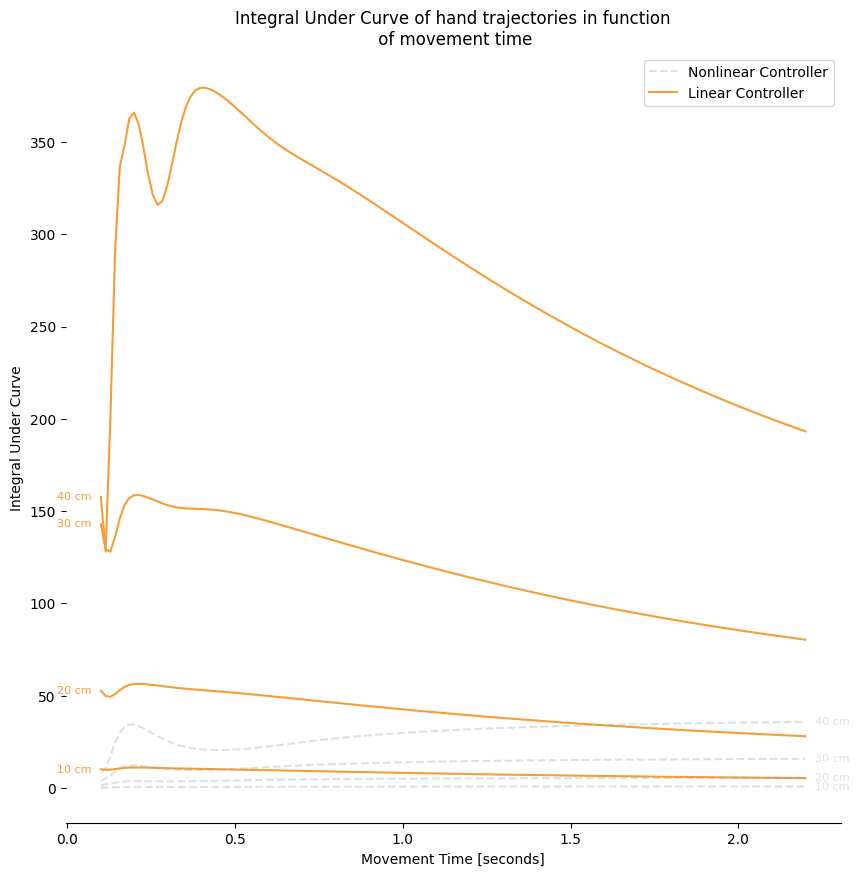

In [17]:
DurationArray = np.linspace(0.1,2.2,150)
MovementArray = [10,20,30,40]

NonlinearityImpact(MovementArray,DurationArray,Integration,"Integral Under Curve")

In [38]:
def Asum(MovementArray,DurationArray,Func,ylabel,Noise = 1e-16):
    SIZE = len(DurationArray)
    COLORLQG = "#F89D36"
    COLORFL = "#8D99AE"
    fig,ax = plt.subplots(figsize = (10,10))

    for MovementLength in MovementArray:

        max_dev_FL = np.zeros(SIZE)
        max_dev_LQG = np.zeros(SIZE)
        for _ in range(20):
            for idx,Duration in enumerate(DurationArray):

                XLQG,YLQG = LQG(Duration,1e6,1e6,1e6,1e6,1e-5,1e-5,targets = [0,20+MovementLength],starting_point = [0,20],plot=False,Noise_Variance=Noise)
                XFL,YFL = Feedback_Linearization(Duration,1e6,1e6,1e5,1e5,1e-5,1e-5,targets = [0,20+MovementLength],starting_point = [0,20],plot=False,Noise_Variance=Noise)
                max_dev_FL[idx] += Func(XFL,YFL)/20
                max_dev_LQG[idx] += Func(XLQG,YLQG)/20

        if MovementLength ==MovementArray[0]: 
            plt.plot(DurationArray,max_dev_FL,color = COLORFL,label = "Nonlinear Controller",alpha = .3, linestyle = "--")
            plt.plot(DurationArray,max_dev_LQG,color = COLORLQG,label = "Linear Controller")
        
        else : 
            plt.plot(DurationArray,max_dev_LQG,color = COLORLQG)
            plt.plot(DurationArray,max_dev_FL,color = COLORFL,alpha = .3, linestyle = "--")
        ax.text(
            -0.03,
            max_dev_LQG[0],
            str(MovementLength)+" cm",
            color=COLORLQG,
            fontsize = 8,
            horizontalalignment="left",
            verticalalignment="center",
        )
        ax.text(
            2.23,
            max_dev_FL[-1],
            str(MovementLength)+" cm",
            color=COLORFL,
            fontsize = 8,
            horizontalalignment="left",
            verticalalignment="center",
            alpha = .3
        )
    plt.title(ylabel + " of hand trajectories in function\n of movement time")
    plt.xlabel("Movement Time [seconds]")
    plt.ylabel(ylabel)

    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

        # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")


    plt.legend()

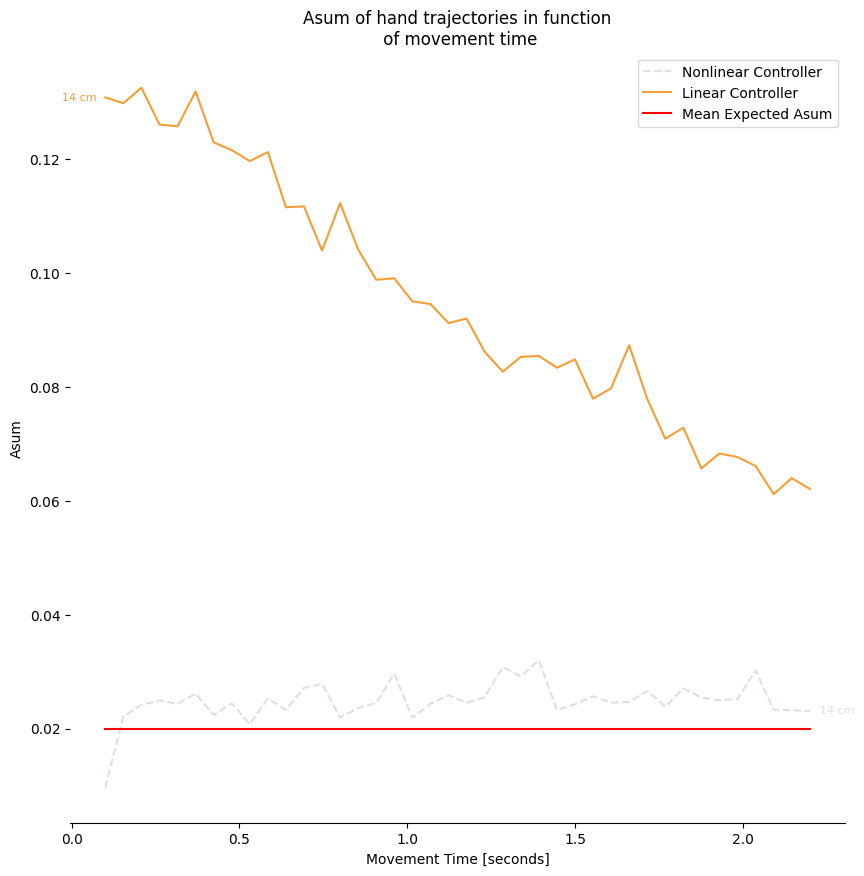

In [39]:
DurationArray = np.linspace(0.1,2.2,40)
MovementArray = [14]

Asum(MovementArray,DurationArray,Integration2,"Asum",Noise = 1e-6)
plt.plot(DurationArray,np.ones(len(DurationArray))*0.02,color = "red", label = "Mean Expected Asum")
plt.legend()
plt.legend()